To connect to kaggle follow [this](https://www.kaggle.com/general/74235) instruction

In [0]:
!pip install kaggle

In [6]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pnaveen","key":"a1b99b0fc823e8df02e967be895c39ab"}'}

In [0]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset
!rm -r "./drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset"
!unzip "novel-corona-virus-2019-dataset.zip" -d "./drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset" 
!rm -f "novel-corona-virus-2019-dataset.zip"

  0% 0.00/389k [00:00<?, ?B/s]
100% 389k/389k [00:00<00:00, 51.0MB/s]
rm: cannot remove './drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset': No such file or directory
Archive:  novel-corona-virus-2019-dataset.zip
  inflating: ./drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv  
  inflating: ./drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv  
  inflating: ./drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset/covid_19_data.csv  
  inflating: ./drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv  
  inflating: ./drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv  
  inflating: ./drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv  


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import timedelta


In [0]:
case_report_path = '/content/drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset/covid_19_data.csv'
patient_report_path = '/content/drive/My Drive/dataset/covid-19/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv'

In [11]:
case_report = pd.read_csv(case_report_path)
case_report.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7925,7926,03/22/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


In [12]:
daily_stat_by_country = case_report.groupby(['ObservationDate','Country/Region'])[['Confirmed','Deaths']].sum().reset_index()
# daily_stat_by_country = daily_stat_by_country.pivot(index = 'ObservationDate',columns='Country/Region',values='Confirmed').fillna(0) #convert to wide-format
daily_stat_by_country.head()

,ObservationDate,Country/Region,Confirmed,Deaths
0,01/22/2020,Hong Kong,0.0,0.0
1,01/22/2020,Japan,2.0,0.0
2,01/22/2020,Macau,1.0,0.0
3,01/22/2020,Mainland China,547.0,17.0
4,01/22/2020,South Korea,1.0,0.0


In [13]:
case_report['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [14]:
daily_stat_by_country.head()

,ObservationDate,Country/Region,Confirmed,Deaths
0,01/22/2020,Hong Kong,0.0,0.0
1,01/22/2020,Japan,2.0,0.0
2,01/22/2020,Macau,1.0,0.0
3,01/22/2020,Mainland China,547.0,17.0
4,01/22/2020,South Korea,1.0,0.0


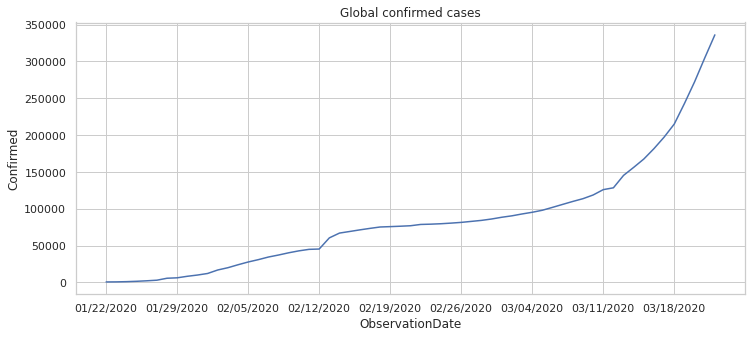

In [15]:
daily_stat_overall = case_report.groupby(['ObservationDate'])[['Confirmed']].sum().reset_index()
daily_stat_overall.head()

plt.figure(figsize=(12, 5))
ax = sns.lineplot(x="ObservationDate",y="Confirmed",data=daily_stat_overall)
ax.set_title("Global confirmed cases")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

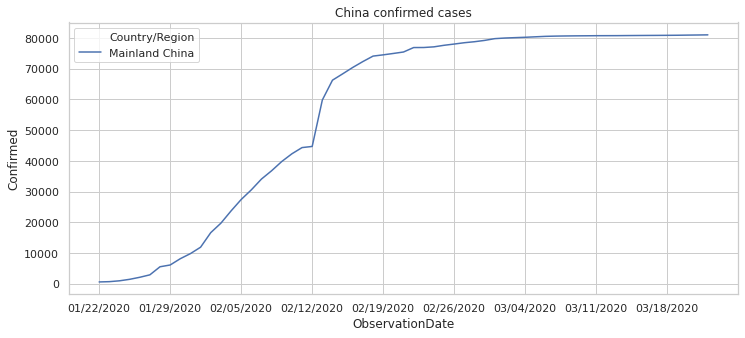

In [16]:
daily_stat_by_selected_country = daily_stat_by_country[
  (daily_stat_by_country['Country/Region']=='Mainland China')]

plt.figure(figsize=(12, 5))
ax = sns.lineplot(x="ObservationDate",y="Confirmed",hue="Country/Region",data=daily_stat_by_selected_country)
ax.set_title("China confirmed cases")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

In [65]:
daily_stat_by_selected_country = daily_stat_by_country[(daily_stat_by_country['Country/Region']=='Mainland China')]
daily_stat_by_selected_country['date']= pd.to_datetime(daily_stat_by_selected_country['ObservationDate'])
daily_stat_by_selected_country['yesterday'] = daily_stat_by_selected_country['date'].apply(lambda x:x- timedelta(days=1))
# self join with yesterday to subtract for new cases
diff_daily_stat_by_selected_country = daily_stat_by_selected_country.merge(right=daily_stat_by_selected_country, left_on='yesterday', right_on='date')
diff_daily_stat_by_selected_country['new_case'] = diff_daily_stat_by_selected_country['Confirmed_x']-diff_daily_stat_by_selected_country['Confirmed_y']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


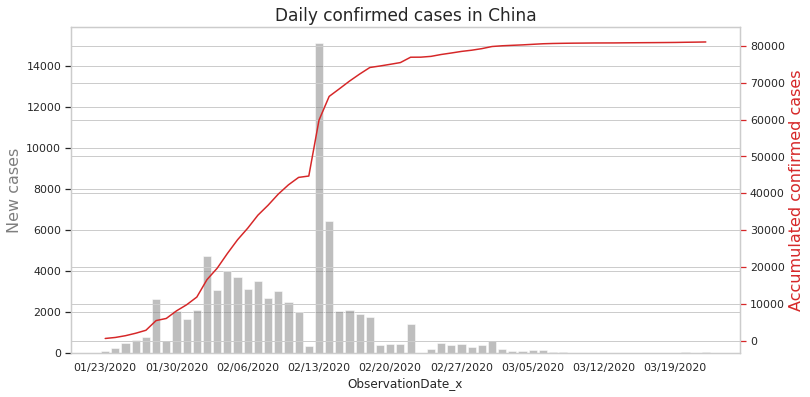

In [66]:
fig, ax = plt.subplots(figsize=(12,6))
color = 'tab:gray'
ax.set_title('Daily confirmed cases in China', fontsize = 17)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax = sns.barplot(x='ObservationDate_x',  y='new_case', data=diff_daily_stat_by_selected_country,alpha=.5,color=color)
ax.set_ylabel('New cases', fontsize=16, color=color)
ax2 = ax.twinx()
color = 'tab:red'
ax2.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax2 = sns.lineplot(x='ObservationDate_x',  y='Confirmed_x', data=diff_daily_stat_by_selected_country,color=color )#,marker='o', markersize=10)
ax2.tick_params(axis='y', color=color)
ax2.set_ylabel('Accumulated confirmed cases', fontsize=16, color=color)
plt.show()

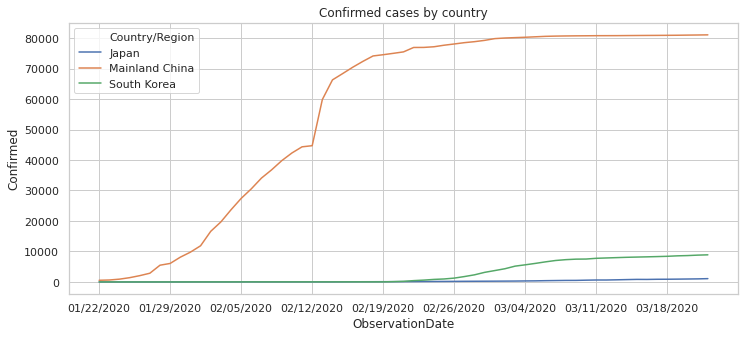

In [19]:
daily_stat_by_selected_country = daily_stat_by_country[
  (daily_stat_by_country['Country/Region']=='Mainland China')
  |(daily_stat_by_country['Country/Region']=='Japan')
  |(daily_stat_by_country['Country/Region']=='South Korea')]

plt.figure(figsize=(12, 5))
ax = sns.lineplot(x="ObservationDate",y="Confirmed",hue="Country/Region",data=daily_stat_by_selected_country)
ax.set_title("Confirmed cases by country")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

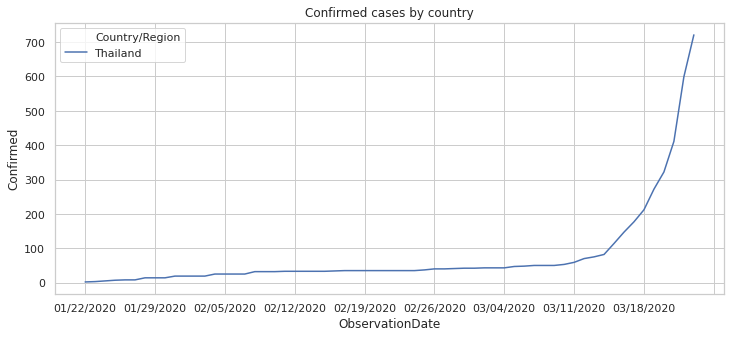

In [62]:
daily_stat_by_selected_country = daily_stat_by_country[
  (daily_stat_by_country['Country/Region']=='Thailand')]
df = pd.DataFrame({"ObservationDate":["03/23/2020"], 
                         "Country/Region":["Thailand"],
                         "Confirmed":[721],
                         "Deaths":[0]}) 
daily_stat_by_selected_country=daily_stat_by_selected_country.append(df)
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x="ObservationDate",y="Confirmed",hue="Country/Region",data=daily_stat_by_selected_country)
ax.set_title("Confirmed cases by country")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

In [61]:
daily_stat_by_selected_country

,ObservationDate,Country/Region,Confirmed,Deaths
6,01/22/2020,Thailand,2.0,0.0
21,01/23/2020,Thailand,3.0,0.0
32,01/24/2020,Thailand,5.0,0.0
46,01/25/2020,Thailand,7.0,0.0
61,01/26/2020,Thailand,8.0,0.0
...,...,...,...,...
3212,03/18/2020,Thailand,212.0,1.0
3382,03/19/2020,Thailand,272.0,1.0
3557,03/20/2020,Thailand,322.0,1.0
3736,03/21/2020,Thailand,411.0,1.0


In [21]:
max_date = np.max(case_report['ObservationDate'])
latest_date_report = case_report[case_report['ObservationDate']==max_date]
latest_date_report.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7617,7618,03/22/2020,Hubei,Mainland China,2020-03-22T09:43:06,67800.0,3144.0,59433.0
7618,7619,03/22/2020,NaN,Italy,2020-03-22T18:13:20,59138.0,5476.0,7024.0
7619,7620,03/22/2020,NaN,Spain,2020-03-22T23:13:18,28768.0,1772.0,2575.0
7620,7621,03/22/2020,NaN,Germany,2020-03-22T23:43:02,24873.0,94.0,266.0
7621,7622,03/22/2020,NaN,Iran,2020-03-22T14:13:06,21638.0,1685.0,7931.0


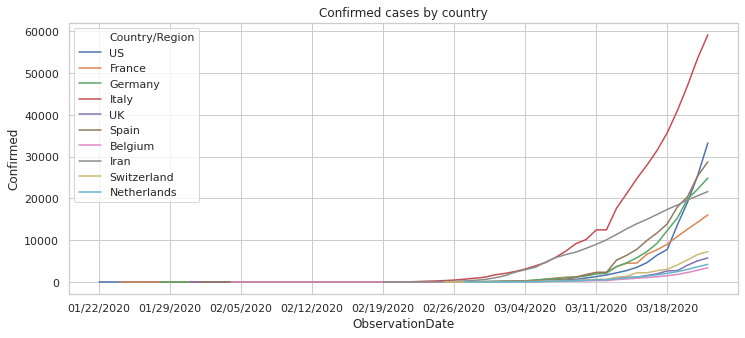

In [22]:
top_countries = latest_date_report.sort_values(by='Confirmed',ascending=False).head(12)
top_countries = top_countries[(top_countries['Country/Region']!='Mainland China')
  &(top_countries['Country/Region']!='South Korea')]
daily_stat_by_selected_country = daily_stat_by_country[daily_stat_by_country['Country/Region'].isin(top_countries['Country/Region'])]
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x="ObservationDate",y="Confirmed",hue="Country/Region",data=daily_stat_by_selected_country)
ax.set_title("Confirmed cases by country")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

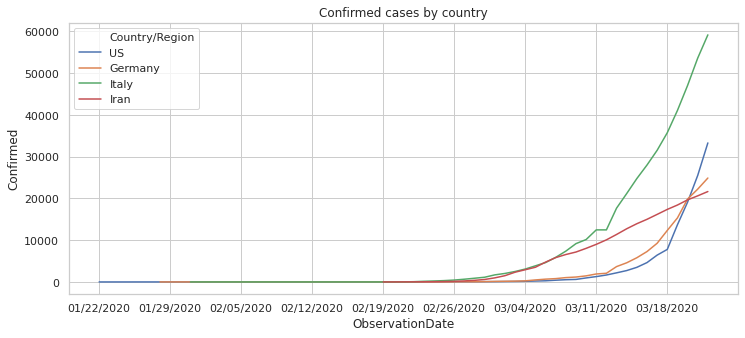

In [23]:
daily_stat_by_selected_country = daily_stat_by_country[
  (daily_stat_by_country['Country/Region']=='Iran')
  |(daily_stat_by_country['Country/Region']=='Italy')
  |(daily_stat_by_country['Country/Region']=='Germany')
  |(daily_stat_by_country['Country/Region']=='US')]

plt.figure(figsize=(12, 5))
ax = sns.lineplot(x="ObservationDate",y="Confirmed",hue="Country/Region",data=daily_stat_by_selected_country)
ax.set_title("Confirmed cases by country")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

# Fatality rate

In [24]:
avg_fatality_rate = 100*np.sum(latest_date_report['Deaths'])/np.sum(latest_date_report['Confirmed'])
print("Covid-19 Fatality rate = "+str(avg_fatality_rate)+"%")

Covid-19 Fatality rate = 4.355914596213206%


In [25]:
case_report_outside_china = latest_date_report[latest_date_report['Country/Region']!='Mainland China']
print("Covid-19 Fatality rate (outside China) = "+str(100*np.sum(case_report_outside_china['Deaths'])/np.sum(case_report_outside_china['Confirmed']))+"%")

Covid-19 Fatality rate (outside China) = 4.4618022181508605%


In [0]:
daily_stat_by_selected_country = daily_stat_by_country.copy()
daily_stat_by_selected_country['date']= pd.to_datetime(daily_stat_by_selected_country['ObservationDate'])
daily_stat_by_selected_country['yesterday'] = daily_stat_by_selected_country['date'].apply(lambda x:x- timedelta(days=1))
# self join with yesterday to subtract for new cases
diff_daily_stat_by_selected_country = daily_stat_by_selected_country.merge(right=daily_stat_by_selected_country, left_on=['yesterday','Country/Region'], right_on=['date','Country/Region'])
diff_daily_stat_by_selected_country['New_Confirmed'] = diff_daily_stat_by_selected_country['Confirmed_x']-diff_daily_stat_by_selected_country['Confirmed_y']


Death rate still increases over time


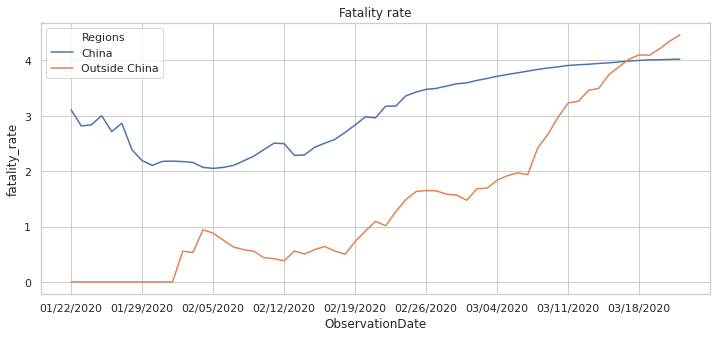

In [27]:
daily_stat_china_and_outside_china = daily_stat_by_country.copy()
daily_stat_china_and_outside_china['Regions'] = daily_stat_china_and_outside_china['Country/Region'].apply(lambda x: 'China' if x=='Mainland China' else 'Outside China')
daily_stat_china_and_outside_china.head()
daily_stat_china_and_outside_china = daily_stat_china_and_outside_china.groupby(['ObservationDate','Regions'])[['Confirmed','Deaths']].sum().reset_index()
daily_stat_china_and_outside_china['fatality_rate']= 100*daily_stat_china_and_outside_china['Deaths']/daily_stat_china_and_outside_china['Confirmed']

plt.figure(figsize=(12, 5))
ax = sns.lineplot(x="ObservationDate",y="fatality_rate",hue="Regions",data=daily_stat_china_and_outside_china)
ax.set_title("Fatality rate")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

In [28]:
daily_stat_by_country[(daily_stat_by_country['Country/Region']=='Mainland China')&(daily_stat_by_country['ObservationDate']=='02/12/2020')]

,ObservationDate,Country/Region,Confirmed,Deaths
490,02/12/2020,Mainland China,44699.0,1116.0


In [0]:
diseases_fatality_rate = pd.DataFrame(np.array([['Bird flu', 60]
                                               ,['Ebola', 50 ]
                                               ,['MERS', 34.4 ]
                                               ,['Smallpox', 30]
                                               ,['SARS',15]
                                               ,['Covid-19', 3.3]
                                               ,['Dengue fever',1] 
                                               ,['Malaria',0.3]                                               
                                               ,['Seasonal flu',0.1]])
                                               ,columns=['Diseases', 'Fatality rate(%)'])
diseases_fatality_rate['Fatality rate(%)']=diseases_fatality_rate['Fatality rate(%)'].astype(float)

**Fatality rate sources**

[Smallpox](https://www.who.int/biologicals/vaccines/smallpox/en/) 

[Ebola](https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease)

[MERS](https://www.who.int/emergencies/mers-cov/en/)

[SARS](https://www.who.int/csr/sars/en/WHOconsensus.pdf)

[Measles](https://www.cdc.gov/vaccines/pubs/pinkbook/meas.html)

[bird flu](https://www.who.int/influenza/human_animal_interface/avian_influenza/h5n1_research/faqs/en/)

[seasonal flu](https://www.who.int/news-room/q-a-detail/q-a-similarities-and-differences-covid-19-and-influenza)

[dengue fever](https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue) 

[Malaria](https://www.who.int/healthinfo/indicators/2015/chi_2015_33_mortality_malaria.pdf)

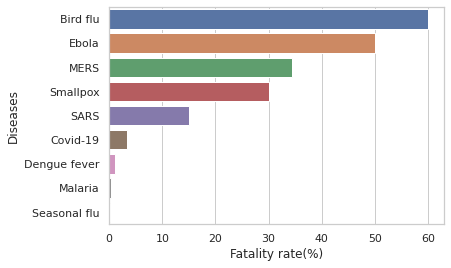

In [30]:
sns.barplot(y="Diseases", x="Fatality rate(%)", data=diseases_fatality_rate,orient = 'h')
plt.show()

**Fatality rate by country**

In [31]:
fatality_rate = latest_date_report.groupby('Country/Region')[['Confirmed','Deaths']].sum()
fatality_rate['fatality_rate'] = 100.0*fatality_rate['Deaths']/fatality_rate['Confirmed']
fatality_rate_new = fatality_rate.reset_index()
fatality_rate_with_min_confirmed = fatality_rate[(fatality_rate['Confirmed']>100)&(fatality_rate['fatality_rate']>avg_fatality_rate-1.7)].reset_index()
fatality_rate_with_min_confirmed.sort_values(by=['fatality_rate'],ascending=False).head(50)

,Country/Region,Confirmed,Deaths,fatality_rate
13,San Marino,160.0,20.0,12.500000
4,Indonesia,514.0,48.0,9.338521
7,Italy,59138.0,5476.0,9.259698
6,Iraq,233.0,20.0,8.583691
0,Algeria,201.0,17.0,8.457711
5,Iran,21638.0,1685.0,7.787226
12,Philippines,380.0,25.0,6.578947
14,Spain,28768.0,1772.0,6.159622
15,UK,5741.0,282.0,4.912036
3,Hungary,131.0,6.0,4.580153


In [32]:
plt.figure(figsize=(12, 5))
ax = sns.scatterplot(y="Deaths", x="Confirmed", data=fatality_rate_new)
ax.set(xscale="log", yscale="log")

for line in range(0,fatality_rate_new.shape[0]):
    ax.text(fatality_rate_new["Confirmed"][line], fatality_rate_new["Deaths"][line], 
    fatality_rate_new["Country/Region"][line], horizontalalignment='left', 
    size='medium', color='black')

plt.show()

ValueError: ignored

<Figure size 864x360 with 1 Axes>

In [33]:
fatality_rate_with_min_confirmed.head()

,Country/Region,Confirmed,Deaths,fatality_rate
0,Algeria,201.0,17.0,8.457711
1,Egypt,327.0,14.0,4.281346
2,France,16044.0,674.0,4.200947
3,Hungary,131.0,6.0,4.580153
4,Indonesia,514.0,48.0,9.338521


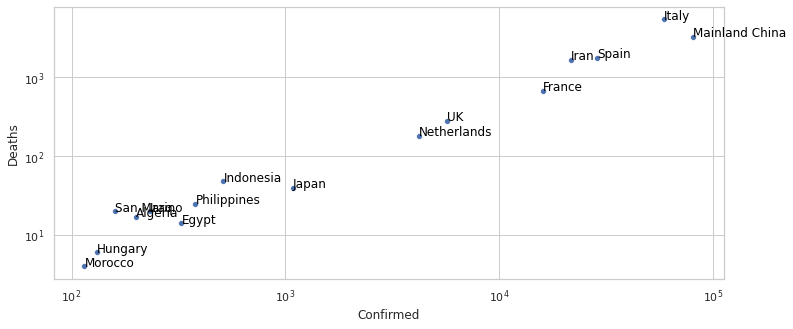

In [34]:
plt.figure(figsize=(12, 5))
ax = sns.scatterplot(y="Deaths", x="Confirmed", data=fatality_rate_with_min_confirmed)
ax.set(xscale="log", yscale="log")

for line in range(0,fatality_rate_with_min_confirmed.shape[0]):
     ax.text(fatality_rate_with_min_confirmed["Confirmed"][line], fatality_rate_with_min_confirmed["Deaths"][line], 
     fatality_rate_with_min_confirmed["Country/Region"][line], horizontalalignment='left', 
     size='medium', color='black')

plt.show()

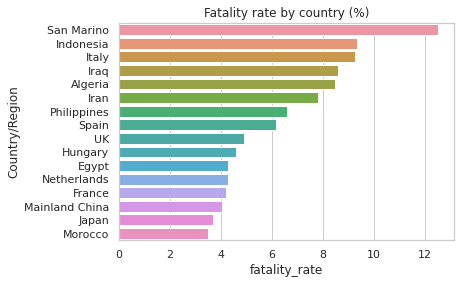

In [35]:
ax=sns.barplot(y="Country/Region", x="fatality_rate", data=fatality_rate_with_min_confirmed.sort_values(by='fatality_rate',ascending=False),orient = 'h')
ax.set_title('Fatality rate by country (%)')
plt.show()

**Fatality rate by gender**

In [36]:
patient_report = pd.read_csv(patient_report_path)
patient_report.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
patient_report.shape

(1085, 27)

In [38]:
patient_report['death'].value_counts()

0            1022
1              42
2/23/2020       4
2/26/2020       3
2/19/2020       2
2/21/2020       2
2/25/2020       2
2/27/2020       2
2/28/2020       1
2/22/2020       1
2/14/2020       1
2/24/2020       1
02/01/20        1
2/13/2020       1
Name: death, dtype: int64

In [0]:
patient_report['death_clean'] = patient_report['death'].apply(lambda x: 0 if x=='0' else 1)

In [40]:
patient_report['death_clean'].value_counts()

0    1022
1      63
Name: death_clean, dtype: int64

In [41]:
dataset_fatality_rate = 100*np.sum(patient_report['death_clean'])/patient_report.shape[0]
print("dataset fatality rate = "+str(dataset_fatality_rate)+"%")

dataset fatality rate = 5.806451612903226%


Note that dataset fatality rate is highly deviated from average fatality rate


In [42]:
patient_report['gender'].value_counts()

male      520
female    382
Name: gender, dtype: int64

In [43]:
male_patient = patient_report[patient_report['gender']=='male']
male_fatality_rate = 100*np.sum(male_patient['death_clean'])/male_patient.shape[0]
print("male fatality rate = "+str(male_fatality_rate)+"%")

male fatality rate = 8.461538461538462%


In [44]:
female_patient = patient_report[patient_report['gender']=='female']
female_fatality_rate = 100*np.sum(female_patient['death_clean'])/female_patient.shape[0]
print("female fatality rate = "+str(female_fatality_rate)+"%")

female fatality rate = 3.6649214659685865%


**Fatality rate by age**

In [45]:
patient_report['age'].unique()

array([66.  , 56.  , 46.  , 60.  , 58.  , 44.  , 34.  , 37.  , 39.  ,
       18.  , 32.  , 51.  , 57.  , 50.  , 52.  , 33.  , 40.  , 70.  ,
         nan, 28.  , 19.  , 29.  , 55.  , 68.  , 38.  , 72.  , 45.  ,
       42.  , 69.  , 63.  , 62.  , 49.  , 48.  , 36.  , 61.  , 89.  ,
       75.  , 82.  , 81.  , 65.  , 80.  , 53.  , 86.  , 84.  , 59.  ,
       23.  , 43.  , 22.  , 47.  , 85.  , 73.  , 30.  , 76.  , 79.  ,
       87.  , 78.  , 67.  ,  2.  , 20.  , 24.  , 41.  ,  9.  , 27.  ,
       15.  , 21.  , 64.  , 71.  , 31.  , 35.  ,  4.  , 25.  ,  5.  ,
       11.  , 83.  ,  0.5 , 54.  , 26.  ,  1.  , 77.  , 74.  ,  6.  ,
        8.  , 16.  ,  0.25, 91.  , 96.  ])

In [46]:
bins=[0,10,20,30,40,50,60,70,80,100]
patient_report['age_binned']= pd.cut(patient_report['age'],bins)
patient_report[['age','age_binned']].head()

,age,age_binned
0,66.0,"(60, 70]"
1,56.0,"(50, 60]"
2,46.0,"(40, 50]"
3,60.0,"(50, 60]"
4,58.0,"(50, 60]"


In [47]:
report_group_by_age = patient_report.groupby('age_binned').agg({'death_clean':['sum','count']})
report_group_by_age['fatality rate'] = 100.0*report_group_by_age['death_clean','sum']/report_group_by_age['death_clean','count']
report_group_by_age

death_clean       fatality rate
                   sum count              
age_binned                                
(0, 10]              0    19      0.000000
(10, 20]             0    15      0.000000
(20, 30]             0   105      0.000000
(30, 40]             3   149      2.013423
(40, 50]             3   131      2.290076
(50, 60]             9   183      4.918033
(60, 70]            18   134     13.432836
(70, 80]            11    72     15.277778
(80, 100]           14    35     40.000000

In [48]:
patient_report.groupby(['gender','age_binned'])['id'].count()

gender  age_binned
female  (0, 10]         5
        (10, 20]        8
        (20, 30]       47
        (30, 40]       61
        (40, 50]       47
        (50, 60]       80
        (60, 70]       58
        (70, 80]       30
        (80, 100]      13
male    (0, 10]        10
        (10, 20]        6
        (20, 30]       55
        (30, 40]       85
        (40, 50]       82
        (50, 60]      102
        (60, 70]       74
        (70, 80]       41
        (80, 100]      21
Name: id, dtype: int64

# R0

In [0]:
r0 = pd.DataFrame(np.array([['Bird flu', 2.2]
                                               ,['Ebola', 1.9 ]
                                               ,['MERS', 0.8 ]
                                               ,['Smallpox', 4.8]
                                               ,['SARS',3]
                                               ,['Covid-19', 2.5]                                             
                                               ,['Seasonal flu',1.3]])
                                               ,columns=['Diseases', 'r0'])
r0['r0']=r0['r0'].astype(float)

# R0 and fatality rate

In [0]:
r0_fatality_rate = pd.DataFrame(np.array([['Bird flu', 60,2.2]
                                               ,['Ebola',50, 1.9 ]
                                               ,['MERS',34.4, 0.8 ]
                                               ,['Smallpox',30, 4.8]
                                               ,['SARS',15,3]
                                               ,['Covid-19',4.15, 2.5]                                             
                                               ,['Seasonal flu',0.1,1.3]])
                                               ,columns=['Diseases', 'Fatality rate(%)','R0'])
r0_fatality_rate['Fatality rate(%)']=r0_fatality_rate['Fatality rate(%)'].astype(float)
r0_fatality_rate['R0']=r0_fatality_rate['R0'].astype(float)


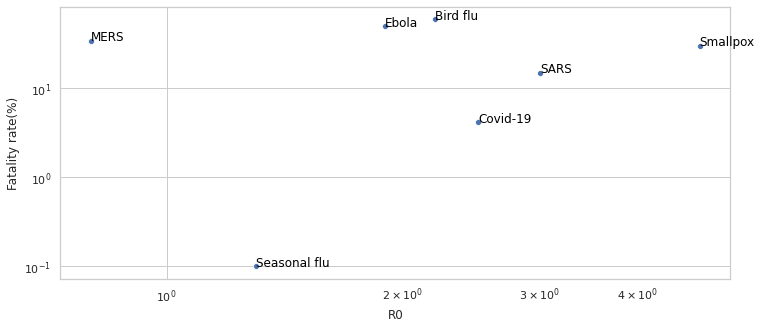

In [51]:
plt.figure(figsize=(12, 5))
ax = sns.scatterplot(y="Fatality rate(%)", x="R0", data=r0_fatality_rate)
ax.set(xscale="log", yscale="log")

for line in range(0,r0_fatality_rate.shape[0]):
     ax.text(r0_fatality_rate["R0"][line], r0_fatality_rate["Fatality rate(%)"][line], 
     r0_fatality_rate["Diseases"][line], horizontalalignment='left', 
     size='medium', color='black')

plt.show()